In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# upload datasets into dataframe
ed_stats_country=pd.read_csv('EdStatsCountry.csv')
ed_stats_country_series=pd.read_csv('EdStatsCountry-Series.csv')
ed_stats_data=pd.read_csv('EdStatsData.csv')
ed_stats_footNote=pd.read_csv('EdStatsFootNote.csv')
ed_stats_series=pd.read_csv('EdStatsSeries.csv')

# 1- Exploratory analysis of dataframes

In [3]:
# method to establish a dataframe survey
def dataframe_survey(dataframes):
    data_survey=pd.DataFrame(columns=['dataframe','(rows, column)','Total number of nans','percentage of nans','number of duplicated rows','percentage of duplicated rows'])
    for df_name, df_var in dataframes.items():
        shape=str(df_var.shape)
        nans=df_var.isna().sum().sum()
        per_nans='{} %'.format(  round(  ((df_var.isna().sum().sum()/df_var.size).astype(float))*100 ,2) )
        dup_rows=df_var.duplicated().sum()
        per_dup_rows='{} %'.format((df_var.duplicated().sum())/(df_var.shape[0]))
        new_row={'dataframe':df_name,
                 '(rows, column)':shape,
                 'Total number of nans': nans,
                 'percentage of nans': per_nans,
                 'number of duplicated rows':dup_rows,
                 'percentage of duplicated rows':per_dup_rows}
        data_survey=data_survey.append(new_row, ignore_index=True)
    return data_survey

In [4]:
dataframes={'ed_stats_country':ed_stats_country,
            'ed_stats_country_series': ed_stats_country_series,
            'ed_stats_data': ed_stats_data,
            'ed_stats_footNote': ed_stats_footNote,
            'ed_stats_series': ed_stats_series,}
dataframe_survey(dataframes)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,ed_stats_country,"(241, 32)",2354,30.52 %,0,0.0 %
1,ed_stats_country_series,"(613, 4)",613,25.0 %,0,0.0 %
2,ed_stats_data,"(886930, 70)",53455179,86.1 %,0,0.0 %
3,ed_stats_footNote,"(643638, 5)",643638,20.0 %,0,0.0 %
4,ed_stats_series,"(3665, 21)",55203,71.72 %,0,0.0 %


In [5]:
# method to make a survey of dataframe columns
def variable_survey (dataframe):
    df=pd.DataFrame(columns = ['variable name', 'variable type', 'nbr of distinct values','percentage of NaNs'])
    for column in (dataframe.columns):
        var_type = dataframe[column].dtypes
        distinct_values = dataframe[column].nunique()
        percentage_nans = '{} %'.format(round((dataframe[column].isna().sum()/len(dataframe))*100,2))
        new_row={'variable name':column,
                 'variable type':var_type,
                 'nbr of distinct values':distinct_values,
                 'percentage of NaNs':percentage_nans}
        df=df.append(new_row, ignore_index=True)
    return df
        

In [6]:
variable_survey(ed_stats_data)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,Country Name,object,242,0.0 %
1,Country Code,object,242,0.0 %
2,Indicator Name,object,3665,0.0 %
3,Indicator Code,object,3665,0.0 %
4,1970,float64,24595,91.85 %
...,...,...,...,...
65,2085,float64,7335,94.2 %
66,2090,float64,7150,94.2 %
67,2095,float64,7044,94.2 %
68,2100,float64,6914,94.2 %


In [7]:
# statistical data overview 
ed_stats_series.describe(include='all')

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
count,3665,3665,3665,2156,3665,0.0,99,314,552,47,...,0.0,14,3665,23,3,215,0.0,0.0,0.0,0.0
unique,3665,37,3665,1169,2060,NaN,1,4,14,3,...,NaN,8,31,2,1,1,NaN,NaN,NaN,NaN
top,UIS.R.2.GPV.G4.F,Learning Outcomes,PIAAC: Adults by literacy proficiency level (%...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,NaN,Annual,Projections (2010 to 2100),EGRA,Weighted average,...,NaN,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm,NaN,NaN,NaN,NaN
freq,1,1046,1,215,215,NaN,99,308,403,31,...,NaN,3,1269,20,3,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
variable_survey(ed_stats_series)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,Series Code,object,3665,0.0 %
1,Topic,object,37,0.0 %
2,Indicator Name,object,3665,0.0 %
3,Short definition,object,1169,41.17 %
4,Long definition,object,2060,0.0 %
5,Unit of measure,float64,0,100.0 %
6,Periodicity,object,1,97.3 %
7,Base Period,object,4,91.43 %
8,Other notes,object,14,84.94 %
9,Aggregation method,object,3,98.72 %


In [9]:
variable_survey(ed_stats_data)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,Country Name,object,242,0.0 %
1,Country Code,object,242,0.0 %
2,Indicator Name,object,3665,0.0 %
3,Indicator Code,object,3665,0.0 %
4,1970,float64,24595,91.85 %
...,...,...,...,...
65,2085,float64,7335,94.2 %
66,2090,float64,7150,94.2 %
67,2095,float64,7044,94.2 %
68,2100,float64,6914,94.2 %


# 2- Dataframe indicators filtering

## 2.1- Filtering indicators by topic in 'ed-stats-series'

In [10]:
pd.options.display.max_colwidth=9000

In [11]:
# group indicators by topics in ed_stat_series dataframe
grouped_df= ed_stats_series.groupby('Topic')
grouped_lists = grouped_df['Indicator Name'].apply(list)
grouped_lists = grouped_lists.reset_index()
grouped_lists

Topic  \
0                                                                                     Attainment   
1                                                                                     Background   
2                                                                                           EMIS   
3                                                                Early Child Development (SABER)   
4                                                                      Early Childhood Education   
5                          Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita   
6   Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators   
7         Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators   
8                                                Economic Policy & Debt: Purchasing power parity   
9                                                                             Education Equality   
10                                              Education Management Information Systems (SABER)   
11                                                           Engaging the Private Sector (SABER)   
12                                                                                  Expenditures   
13                                                                             Health: Mortality   
14                                                                  Health: Population: Dynamics   
15                                                                 Health: Population: Structure   
16                                                                          Health: Risk factors   
17                                                                Infrastructure: Communications   
18                                                                                         Laber   
19                                                                             Learning Outcomes   
20                                                                                      Literacy   
21                                                                                    Population   
22                                                                   Post-Secondary/Non-Tertiary   
23                                                                                   Pre-Primary   
24                                                                                       Primary   
25                                                    School Autonomy and Accountability (SABER)   
26                                                                        School Finance (SABER)   
27                                                      School Health and School Feeding (SABER)   
28                                                                                     Secondary   
29                                              Social Protection & Labor: Labor force structure   
30                                                       Social Protection & Labor: Unemployment   
31                                                                    Student Assessment (SABER)   
32                                                                                      Teachers   
33                                                                              Teachers (SABER)   
34                                                                                      Tertiary   
35                                                                    Tertiary Education (SABER)   
36                                                                 Workforce Development (SABER)   

                                                                                                                                                                                                                                                                                                  

###### save indicators where Topics are in
{ 0:     Attainment ; 
  12:    Expenditures; 
  17:    Infrastructure: Communications;
  28:    Secondary;
  34:    Tertiary
  }
  
            3665 rows  --> 1242 rows​

In [12]:
selected_topics=['Attainment','Expenditures','Infrastructure: Communications','Secondary','Tertiary']
filtered_series=ed_stats_series[ed_stats_series["Topic"].isin(selected_topics)]
filtered_series

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary student (constant US$),NaN,"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in US$ at market exchange rates, in constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant US$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. This indicator is useful to compare average spending on one student between levels of education, over time, or between countries. Constant US$ allow comparing absolute values using a common currency, and taking into account the effect of inflation. This indicator should not be considered a unit cost, since it only includes what the government spends, and not total spending per student (including household contributions). Since it is a simple division of total government expenditure by the number of students at a given level, whether they attend public or private institutions, in countries where private provision and/or funding of education is higher the average amount per student will appear lower. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-tertiary student (constant US$),NaN,"Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in US$ at market exchange rates, in constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant US$) for a given le

In [13]:
# group indicators by topics in ed_stat_series dataframe
grouped_df= filtered_series.groupby('Topic')
grouped_lists = grouped_df['Indicator Name'].apply(list)
grouped_lists = grouped_lists.reset_index()
grouped_lists

Topic  \
0                      Attainment   
1                    Expenditures   
2  Infrastructure: Communications   
3                       Secondary   
4                        Tertiary   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

## 2.2- Filtering indicators by keywords in 'ed-stats-series'

             1242 rows--> 606 --> 178 rows​


In [14]:
# get indicators list from filtered ed_stats_series
selected_topics=['Infrastructure: Communications','Secondary','Tertiary']
filtered_series=filtered_series[(filtered_series['Topic'].isin(selected_topics))\
                                |((filtered_series['Indicator Name'].str.contains('15-19|20-24',na=False)) & (filtered_series['Topic']=='Attainment'))\
                                |((filtered_series['Indicator Name'].str.contains('secondary|tertiary',na=False))& (filtered_series['Topic']=='Expenditures'))]

len(filtered_series)

606

In [15]:
#Filtering indicators where Topic = 'Attainment' by keyword (delete those containing 'female', 'male', or 'primary')
filtered_series.drop(filtered_series.loc[(filtered_series['Topic'] == 'Attainment')\
                                          &(filtered_series['Indicator Name'].str.contains('female|male|primary',na=False,case=False))].index, inplace = True)
##Filtering indicators where Topic = 'Expenditure' by keyword (delete those containing non-tertiary)
filtered_series.drop(filtered_series.loc[(filtered_series['Topic'] == 'Expenditures')\
                                          &(filtered_series['Indicator Name'].str.contains('non-tertiary',na=False,case=False))].index, inplace = True)
##Filtering indicators where Topic = 'Secondary' by keyword (delete those containing 'male' or 'female')
filtered_series.drop(filtered_series.loc[(filtered_series['Topic'] == 'Secondary')\
                                          &(filtered_series['Indicator Name'].str.contains('male|female|lower',na=False,case=False))].index, inplace = True)
##Filtering indicators where Topic = 'Tertiary' by keyword (delete those containing 'male' or 'female')
filtered_series.drop(filtered_series.loc[(filtered_series['Topic'] == 'Tertiary')\
                                          &(filtered_series['Indicator Name'].str.contains('male|female',na=False,case=False))].index, inplace = True)
len(filtered_series)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


178

## 2.3- Filtering indicators in 'ed-stat-data'

           886930 rows-->38720 rows

In [16]:
selected_indicators=filtered_series['Indicator Name'].tolist()
len(selected_indicators)

178

In [17]:
filtered_ed_stats_data= ed_stats_data[ed_stats_data['Indicator Name'].isin (selected_indicators)]
filtered_ed_stats_data.shape

(38720, 70)

In [18]:
variable_survey(filtered_ed_stats_data)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,Country Name,object,242,0.0 %
1,Country Code,object,242,0.0 %
2,Indicator Name,object,160,0.0 %
3,Indicator Code,object,160,0.0 %
4,1970,float64,2595,88.82 %
...,...,...,...,...
65,2085,float64,0,100.0 %
66,2090,float64,0,100.0 %
67,2095,float64,0,100.0 %
68,2100,float64,0,100.0 %


In [19]:
dataframes={'filtered_data': filtered_ed_stats_data}
dataframe_survey(dataframes)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,filtered_data,"(38720, 70)",2202551,81.26 %,0,0.0 %


# 3- Dataframe Nans filtering in ed_stats_data

       (38720 rows, 70 columns)  -->   (827  rows, 52 columns)

In [20]:
# define a function to visualise NaNs
def heatmap_nans(dataframe, th):
    print(((dataframe.isna().sum()/dataframe.shape[0])*100).sort_values())
    dataframe=dataframe[dataframe.columns[((dataframe.isna().sum()/dataframe.shape[0])*100)<th]]
    plt.figure(figsize=(20,10))
    sns.heatmap(dataframe.isna(),cbar=False)
    return dataframe

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
2010               54.692665
                     ...    
2025              100.000000
2020              100.000000
2017              100.000000
2100              100.000000
Unnamed: 69       100.000000
Length: 70, dtype: float64


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
8,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, both sexes (%)",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Arab World,ARB,"Adjusted net enrolment rate, upper secondary, gender parity index (GPI)",UIS.NERA.3.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Arab World,ARB,All staff compensation as % of total expenditure in lower secondary public institutions (%),UIS.XSPENDP.2.FDPUB.FNS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,Arab World,ARB,All staff compensation as % of total expenditure in secondary public institutions (%),UIS.XSPENDP.23.FDPUB.FNS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,Arab World,ARB,All staff compensation as % of total expenditure in tertiary public institutions (%),UIS.XSPENDP.56.FDPUB.FNS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886251,Zimbabwe,ZWE,Theoretical duration of secondary education (years),SE.SEC.DURS,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.00000,6.00000,6.0,6.0,6.0
886252,Zimbabwe,ZWE,Theoretical duration of upper secondary education (years),SE.SEC.DURS.UP,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.00000,4.00000,4.0,4.0,4.0
886353,Zimbabwe,ZWE,"Total inbound internationally mobile students, both sexes (number)",UIS.MS.56.T,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,889.0,884.0,648.0,352.00000,NaN,NaN,NaN,NaN
886363,Zimbabwe,ZWE,"Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)",UIS.OE.56.40510,NaN,NaN,NaN,NaN,NaN,NaN,...,21347.0,24581.0,20792.0,25236.0,28700.0,16012.00000,15885.00000,NaN,NaN,NaN


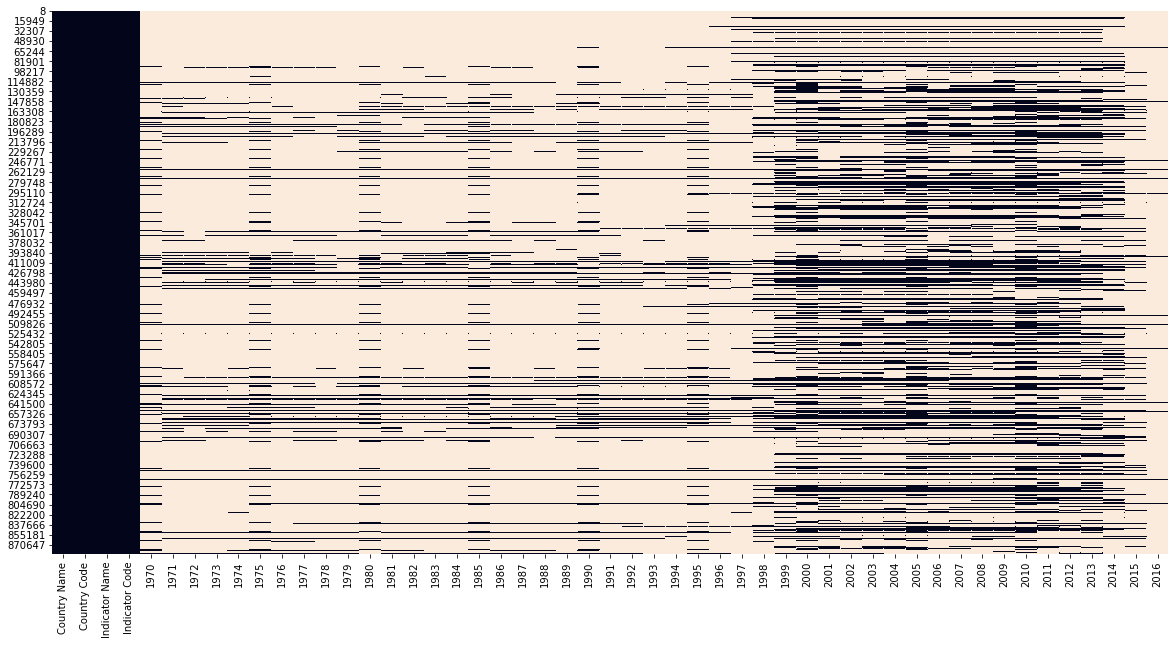

In [21]:
heatmap_nans(filtered_ed_stats_data,100)

In [22]:
filtered_data=filtered_ed_stats_data[filtered_ed_stats_data.columns[((filtered_ed_stats_data.isna().sum()/filtered_ed_stats_data.shape[0])*100)<100]]
filtered_data.shape

(38720, 51)

In [23]:
# count percentage of nans per row
print(round(((filtered_data.isna().sum(axis=1))/((filtered_data.shape[1])-4)*100),2).sort_values())

757976      0.0
193566      0.0
406136      0.0
406137      0.0
354827      0.0
          ...  
619771    100.0
619772    100.0
619773    100.0
619567    100.0
8         100.0
Length: 38720, dtype: float64


In [24]:
# drop rows according to a fixed threshold of nans percentage
filtered_data= filtered_data.drop(filtered_data[((filtered_data.isna().sum(axis=1))/((filtered_data.shape[1])-4)*100)==100].index) 

In [25]:
list=((filtered_data.isna().sum(axis=1))/filtered_data.shape[1])*100
print(list)

1171      62.745098
1191       3.921569
1193      58.823529
1197       3.921569
1199       3.921569
            ...    
886251     0.000000
886252     0.000000
886353    84.313725
886363    60.784314
886608    78.431373
Length: 26762, dtype: float64


In [26]:
filtered_data.shape

(26762, 51)

    38720 rows  --> 26762 rows

In [27]:
nans_rows_percentage = list.tolist()
filtered_data.insert(3,'nans percentage',nans_rows_percentage)
filtered_data


,Country Name,Country Code,Indicator Name,nans percentage,Indicator Code,1970,1971,1972,1973,1974,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1171,Arab World,ARB,"Enrolment in post-secondary non-tertiary education, both sexes (number)",62.745098,UIS.E.4,NaN,NaN,NaN,NaN,NaN,...,3.086392e+05,2.905856e+05,2.742247e+05,248527.25,2.202545e+05,2.058710e+05,3.115771e+05,3.293756e+05,NaN,NaN
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (number)",3.921569,SE.SEC.ENRL,4842861.500,4.981844e+06,5270417.50,5593058.500,5938865.50,...,2.849438e+07,2.893511e+07,2.957251e+07,30134376.00,3.129979e+07,3.181115e+07,3.125060e+07,3.097225e+07,NaN,NaN
1193,Arab World,ARB,"Enrolment in secondary education, private institutions, both sexes (number)",58.823529,UIS.E.23.PR,NaN,NaN,NaN,NaN,NaN,...,1.956765e+06,2.087889e+06,2.097570e+06,2182373.25,2.327964e+06,2.454828e+06,2.514028e+06,2.601100e+06,NaN,NaN
1197,Arab World,ARB,"Enrolment in secondary general, both sexes (number)",3.921569,SE.SEC.ENRL.GC,4356650.000,4.477696e+06,4737669.50,5039257.000,5305330.00,...,2.563687e+07,2.615166e+07,2.696901e+07,27483194.00,2.837384e+07,2.876566e+07,2.820554e+07,2.805445e+07,NaN,NaN
1199,Arab World,ARB,"Enrolment in secondary vocational, both sexes (number)",3.921569,SE.SEC.ENRL.VO,486211.625,5.041479e+05,532748.25,553801.375,633535.75,...,2.857512e+06,2.783442e+06,2.603492e+06,2651181.00,2.925946e+06,3.045490e+06,3.045056e+06,2.917798e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886251,Zimbabwe,ZWE,Theoretical duration of secondary education (years),0.000000,SE.SEC.DURS,6.000,6.000000e+00,6.00,6.000,6.00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.0,6.0
886252,Zimbabwe,ZWE,Theoretical duration of upper secondary education (years),0.000000,SE.SEC.DURS.UP,4.000,4.000000e+00,4.00,4.000,4.00,...,4.000000e+00,4.000000e+00,4.000000e+00,4.00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.0,4.0
886353,Zimbabwe,ZWE,"Total inbound internationally mobile students, both sexes (number)",84.313725,UIS.MS.56.T,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.890000e+02,884.00,6.480000e+02,3.520000e+02,NaN,NaN,NaN,NaN
886363,Zimbabwe,ZWE,"Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)",60.784314,UIS.OE.56.40510,NaN,NaN,NaN,NaN,NaN,...,2.134700e+04,2.458100e+04,2.079200e+04,25236.00,2.870000e+04,1.601200e+04,1.588500e+04,NaN,NaN,NaN


In [28]:
pd.set_option("display.max_rows", None)

In [29]:
# display the mean of nans percentage for each indicator name --> discart those having a hight rate of nans
df=filtered_data.groupby('Indicator Name').agg({'nans percentage': ['mean']})
df

,nans percentage
,mean
Indicator Name,
"Adjusted net enrolment rate, upper secondary, both sexes (%)",82.502810
"Adjusted net enrolment rate, upper secondary, gender parity index (GPI)",82.591755
All staff compensation as % of total expenditure in lower secondary public institutions (%),79.796078
All staff compensation as % of total expenditure in secondary public institutions (%),77.540107
All staff compensation as % of total expenditure in tertiary public institutions (%),77.406417
All staff compensation as % of total expenditure in upper secondary public institutions (%),79.738562
"Barro-Lee: Average years of secondary schooling, age 15-19, total",74.509804
"Barro-Lee: Average years of secondary schooling, age 20-24, total",74.509804


In [30]:
final_selected_indicators=['Expenditure on secondary as % of government expenditure on education (%)',\
                           'Expenditure on tertiary as % of government expenditure on education (%)',\
                           'Gross enrolment ratio, secondary, both sexes (%)'\
                          'Gross enrolment ratio, tertiary, both sexes (%)','Internet users (per 100 people)',\
                           'Personal computers (per 100 people)']
#filtering ed_stats_data by final selected indicators
final_data= filtered_data[filtered_data['Indicator Name'].isin (final_selected_indicators)]
final_data.shape

(827, 52)

In [31]:
final_data

,Country Name,Country Code,Indicator Name,nans percentage,Indicator Code,1970,1971,1972,1973,1974,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1375,Arab World,ARB,Internet users (per 100 people),52.941176,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,...,14.205902,18.593531,22.973689,26.747251,29.707761,34.014224,36.868602,NaN,NaN,NaN
2084,Arab World,ARB,Personal computers (per 100 people),66.666667,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5040,East Asia & Pacific,EAS,Internet users (per 100 people),43.137255,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,...,20.766523,25.253566,29.513198,34.230838,37.365156,40.709345,44.577349,46.812103,49.787924,52.796321
5749,East Asia & Pacific,EAS,Personal computers (per 100 people),54.901961,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),43.137255,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,...,14.382694,19.260138,23.769242,28.957572,32.385761,36.068349,39.708933,42.062234,45.210103,48.386621
9414,East Asia & Pacific (excluding high income),EAP,Personal computers (per 100 people),54.901961,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12370,Euro area,EMU,Internet users (per 100 people),39.215686,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,...,61.383050,64.843610,67.129830,71.036722,72.001164,74.092136,75.821560,77.002322,78.666346,80.446726
13079,Euro area,EMU,Personal computers (per 100 people),54.901961,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16035,Europe & Central Asia,ECS,Internet users (per 100 people),41.176471,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,...,43.674382,47.359045,50.566038,56.119117,58.834630,63.486253,66.306669,68.944351,71.162003,73.914751
16744,Europe & Central Asia,ECS,Personal computers (per 100 people),54.901961,IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
